In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 0) Data

In [8]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=23)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

### 1) Model

In [11]:
input_size = n_features
output_size = 1
learning_rate = 0.01

model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

### 2) Training Loop

In [12]:
epochs = 100
for epoch in range(epochs):
    # forward pass + loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    # backward pass
    loss.backward()
    # update
    optimizer.step()

    # empty values
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f"epoch: {epoch+1}, loss = {loss.item():.4f}")

epoch: 10, loss = 3058.3926
epoch: 20, loss = 2238.6426
epoch: 30, loss = 1672.9448
epoch: 40, loss = 1281.7167
epoch: 50, loss = 1010.5793
epoch: 60, loss = 822.2893
epoch: 70, loss = 691.2770
epoch: 80, loss = 599.9490
epoch: 90, loss = 536.1719
epoch: 100, loss = 491.5592


### 3) Plotting

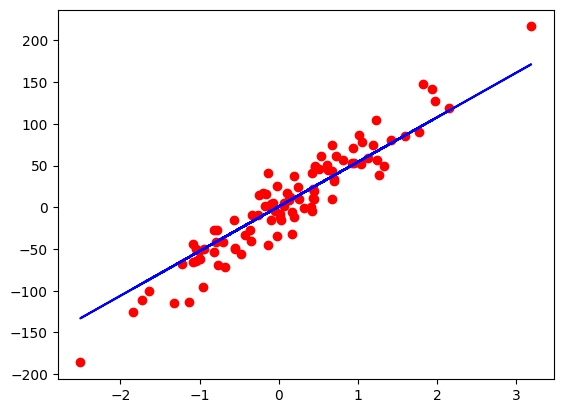

In [13]:
prediction = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, prediction, 'b')
plt.show()